<a href="https://colab.research.google.com/github/tselane2110/Explainable-AI-for-Robot-Telemetry-Data/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. Importing Libraries

In [28]:
# importing required libraries
import pandas as pd
import numpy as np
import os
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 1. Cloning the github repo to extract the dataset

In [2]:
!git clone https://github.com/tselane2110/Explainable-AI-for-Robot-Telemetry-Data

Cloning into 'Explainable-AI-for-Robot-Telemetry-Data'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 1.78 MiB | 6.88 MiB/s, done.
Resolving deltas: 100% (1/1), done.


### 2. Extracting the Dataset

In [3]:
!unzip /content/Explainable-AI-for-Robot-Telemetry-Data/RawData -d /content/

Archive:  /content/Explainable-AI-for-Robot-Telemetry-Data/RawData.zip
   creating: /content/RawData/
   creating: /content/RawData/Dos-Drone/
  inflating: /content/RawData/Dos-Drone/Dos1.csv  
  inflating: /content/RawData/Dos-Drone/Dos2.csv  
   creating: /content/RawData/Malfunction-Drone/
  inflating: /content/RawData/Malfunction-Drone/Malfunction1.csv  
  inflating: /content/RawData/Malfunction-Drone/Malfunction2.csv  
   creating: /content/RawData/NormalFlight/
  inflating: /content/RawData/NormalFlight/Normal1.csv  
  inflating: /content/RawData/NormalFlight/Normal2.csv  
  inflating: /content/RawData/NormalFlight/Normal3.csv  
  inflating: /content/RawData/NormalFlight/Normal4.csv  
  inflating: /content/RawData/ReadMeForDataSet.txt  


### 3. Loading Datasets

In [4]:
# reading the csv files

df_dos1 = pd.read_csv("/content/RawData/Dos-Drone/Dos1.csv")
df_dos2 = pd.read_csv("/content/RawData/Dos-Drone/Dos2.csv")
df_malfunction1 = pd.read_csv("/content/RawData/Malfunction-Drone/Malfunction1.csv")
df_malfunction2 = pd.read_csv("/content/RawData/Malfunction-Drone/Malfunction2.csv")
df_normal1 = pd.read_csv("/content/RawData/NormalFlight/Normal1.csv")
df_normal2 = pd.read_csv("/content/RawData/NormalFlight/Normal2.csv")
df_normal3 = pd.read_csv("/content/RawData/NormalFlight/Normal3.csv")
df_normal4 = pd.read_csv("/content/RawData/NormalFlight/Normal4.csv")

#### DoS Datasets

In [5]:
df_dos1.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729405e+09,1,0,33.69785,73.016496,1.25,1.729405e+09,4605.0,1.729405e+09,...,1.0,1.0,5.0,1.729405e+09,1.0,-39.0,1.729405e+09,15.2,1.729405e+09,5.6
1,1,1.729405e+09,2,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729405e+09,3,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729405e+09,4,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729405e+09,5,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_dos2.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729787e+09,570,0,33.636530,72.99146,1.279,1.729787e+09,12473.0,1.729787e+09,...,0.0,1.0,5.0,1.729787e+09,0.642857,-65.0,1.729787e+09,3.9,1.729787e+09,6.5
1,1,1.729787e+09,664,0,33.636530,72.99146,1.279,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729787e+09,1177,0,33.636530,72.99146,1.279,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729787e+09,1374,0,33.636529,72.99146,1.272,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729787e+09,1417,0,33.636529,72.99146,1.272,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# adding a new column in both dos1 and dos2
df_dos1["class"] = "DoS_Attack"
df_dos2["class"] = "DoS_Attack"

#### Malfunction Datasets

In [8]:
df_malfunction1.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729406e+09,1,0,33.69788,73.016504,1.25,1.729406e+09,8332.0,1.729406e+09,...,1.0,1.0,5.0,1.729406e+09,0.985714,-41.0,1.729406e+09,44.9,1.729406e+09,11.2
1,1,1.729406e+09,2,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729406e+09,3,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729406e+09,4,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729406e+09,5,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_malfunction2.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729688e+09,59,0,33.63709,72.991302,1.25,1.729688e+09,21351.0,1.729688e+09,...,0.0,1.0,5.0,1.729688e+09,0.8,-54.0,1.729688e+09,7.3,1.729688e+09,7.6
1,1,1.729688e+09,66,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729688e+09,369,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729688e+09,2111,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729688e+09,2112,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# adding a new column in both malfunction1 and malfunction2
df_malfunction1["class"] = "Malfunction"
df_malfunction2["class"] = "Malfunction"

#### Normal Datasets

In [11]:
df_normal1.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729315e+09,137,0,33.707308,73.019849,1.25,1.729315e+09,14916.0,1.729315e+09,...,0.0,1.0,5.0,1.729315e+09,1.0,-40.0,1.729315e+09,9.6,1.729315e+09,5.9
1,1,1.729315e+09,139,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729315e+09,141,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729315e+09,147,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729315e+09,155,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_normal2.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729686e+09,2,0,33.637079,72.991263,1.25,1.729686e+09,0.0,1.729686e+09,...,0.0,1.0,3.0,1.729686e+09,1.0,-40.0,1.729686e+09,0.8,1.729686e+09,5.6
1,1,1.729686e+09,3,0,33.637079,72.991263,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729686e+09,4,0,33.637079,72.991263,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729686e+09,5,0,33.637079,72.991263,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729686e+09,6,0,33.637079,72.991263,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_normal3.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729874e+09,351,0,33.636576,72.991521,1.25,1.729874e+09,8469.0,1.729874e+09,...,0.0,1.0,5.0,1.729874e+09,0.957143,-43.0,1.729874e+09,6.2,1.729874e+09,5.5
1,1,1.729874e+09,355,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729874e+09,1648,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729874e+09,1699,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729874e+09,1826,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_normal4.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729786e+09,7,0,33.636539,72.991440,1.25,1.729786e+09,270.0,1.729786e+09,...,0.0,1.0,3.0,1.729786e+09,0.814286,-53.0,1.729786e+09,1.3,1.729786e+09,5.7
1,1,1.729786e+09,452,0,33.636539,72.991440,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729786e+09,1206,0,33.636539,72.991439,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729786e+09,1235,0,33.636539,72.991439,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729786e+09,1247,0,33.636539,72.991439,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# adding a new column in all normal-drone dfs
df_normal1["class"] = "Normal"
df_normal2["class"] = "Normal"
df_normal3["class"] = "Normal"
df_normal4["class"] = "Normal"

### Concatenating all datasets and dropping duplicates

In [16]:
dfs = [df_dos1, df_dos2, df_malfunction1, df_malfunction2, df_normal1, df_normal2, df_normal3, df_normal4]

df = pd.concat(dfs, ignore_index=True).drop_duplicates()


### Data Preprocessing

#### Dropping Null rows and cols

In [17]:
df = df.dropna(axis=1, how='all').dropna(axis=0, how='all')

In [18]:
df.describe()

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
count,87417.000000,8.741700e+04,87417.000000,87417.0,87417.000000,87417.000000,87417.000000,4.349000e+03,4349.000000,4.349000e+03,...,466.000000,466.0,466.000000,8.500000e+01,85.000000,85.000000,1.820000e+02,182.000000,5.530000e+02,553.000000
mean,6633.756363,1.729593e+09,126929.651487,0.0,33.664535,73.002702,4.374865,1.729626e+09,8946.337089,1.729626e+09,...,0.699571,1.0,4.841202,1.729613e+09,0.902185,-46.470588,1.729647e+09,15.958791,1.729644e+09,10.234720
std,4566.256233,2.001018e+05,98296.621753,0.0,0.031810,0.012993,2.820141,2.045361e+05,6819.779788,2.045361e+05,...,0.458937,0.0,0.512739,2.072144e+05,0.095030,7.105645,1.975626e+05,15.360037,1.964418e+05,10.221969
min,0.000000,1.729315e+09,1.000000,0.0,33.636529,72.991018,1.250000,1.729315e+09,0.000000,1.729315e+09,...,0.000000,1.0,3.000000,1.729315e+09,0.628571,-66.000000,1.729315e+09,0.000000,1.729315e+09,4.900000
25%,2781.000000,1.729405e+09,52717.000000,0.0,33.636642,72.991309,2.269000,1.729405e+09,712.000000,1.729405e+09,...,0.000000,1.0,5.000000,1.729405e+09,0.828571,-52.000000,1.729406e+09,7.525000,1.729406e+09,5.600000
50%,5903.000000,1.729686e+09,118526.000000,0.0,33.637122,72.991634,3.451000,1.729686e+09,8704.000000,1.729686e+09,...,1.000000,1.0,5.000000,1.729688e+09,0.914286,-46.000000,1.729688e+09,10.500000,1.729688e+09,5.800000
75%,9794.000000,1.729786e+09,176584.000000,0.0,33.697880,73.016555,5.978000,1.729787e+09,15015.000000,1.729787e+09,...,1.000000,1.0,5.000000,1.729786e+09,1.000000,-40.000000,1.729787e+09,16.725000,1.729787e+09,6.600000
max,17868.000000,1.729874e+09,450486.000000,0.0,33.707439,73.019869,15.985000,1.729874e+09,21832.000000,1.729874e+09,...,1.000000,1.0,5.000000,1.729874e+09,1.000000,-34.000000,1.729874e+09,99.300000,1.729874e+09,44.000000


In [19]:
# dropping S.NO bcz not needed
df.drop(columns=["S.No"], inplace=True)

In [20]:
df.columns, len(df.columns)

(Index(['setpoint_raw-global_Time', 'setpoint_raw-global_header.seq',
        'setpoint_raw-global_header.stamp.secs', 'setpoint_raw-global_latitude',
        'setpoint_raw-global_longitude', 'setpoint_raw-global_altitude',
        'battery_Time', 'battery_header.seq', 'battery_header.stamp.secs',
        'battery_voltage', 'battery_current', 'battery_temperature',
        'battery_percentage', 'global_position-local_Time',
        'global_position-local_header.seq',
        'global_position-local_header.stamp.secs',
        'global_position-local_pose.pose.position.x',
        'global_position-local_pose.pose.position.y',
        'global_position-local_pose.pose.position.z',
        'global_position-local_pose.pose.orientation.x',
        'global_position-local_pose.pose.orientation.y',
        'global_position-local_pose.pose.orientation.z',
        'global_position-local_twist.twist.linear.x',
        'global_position-local_twist.twist.linear.y',
        'global_position-local_twist

In [21]:
# how many null rows each column has
null_stats = pd.DataFrame({
    "null_count": df.isna().sum(),
    "null_percent": df.isna().mean() * 100
})

print(null_stats.to_string())

                                               null_count  null_percent
setpoint_raw-global_Time                                0      0.000000
setpoint_raw-global_header.seq                          0      0.000000
setpoint_raw-global_header.stamp.secs                   0      0.000000
setpoint_raw-global_latitude                            0      0.000000
setpoint_raw-global_longitude                           0      0.000000
setpoint_raw-global_altitude                            0      0.000000
battery_Time                                        83068     95.024995
battery_header.seq                                  83068     95.024995
battery_header.stamp.secs                           83068     95.024995
battery_voltage                                     83068     95.024995
battery_current                                     83068     95.024995
battery_temperature                                 83068     95.024995
battery_percentage                                  83068     95

#### Handling Missing Values

1. CLASS DISTRIBUTION ANALYSIS

Total rows: 87,417

Class distribution:
  Normal: 49,800 rows (56.97%)
  DoS_Attack: 19,587 rows (22.41%)
  Malfunction: 18,030 rows (20.63%)

2. MISSINGNESS PATTERN BY CLASS

DoS_Attack (n=19,587):
  complete: 7 columns
  low_missing: 0 columns
  medium_missing: 0 columns
  high_missing: 0 columns
  very_high_missing: 72 columns
  completely_missing: 0 columns

Malfunction (n=18,030):
  complete: 7 columns
  low_missing: 0 columns
  medium_missing: 0 columns
  high_missing: 0 columns
  very_high_missing: 72 columns
  completely_missing: 0 columns

Normal (n=49,800):
  complete: 7 columns
  low_missing: 0 columns
  medium_missing: 0 columns
  high_missing: 0 columns
  very_high_missing: 72 columns
  completely_missing: 0 columns

3. IS MISSINGNESS INFORMATIVE?

Columns with significantly different missingness across classes: 0

4. COMPLETE CASES ANALYSIS

Complete cases (no missing values): 8 rows
Percentage of complete data: 0.01%

Class distribution in

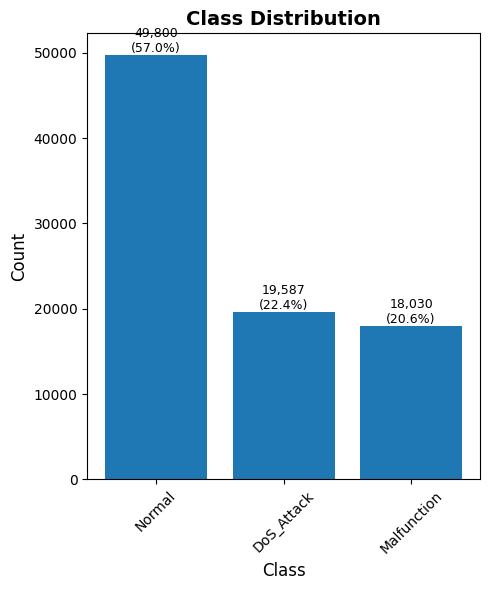

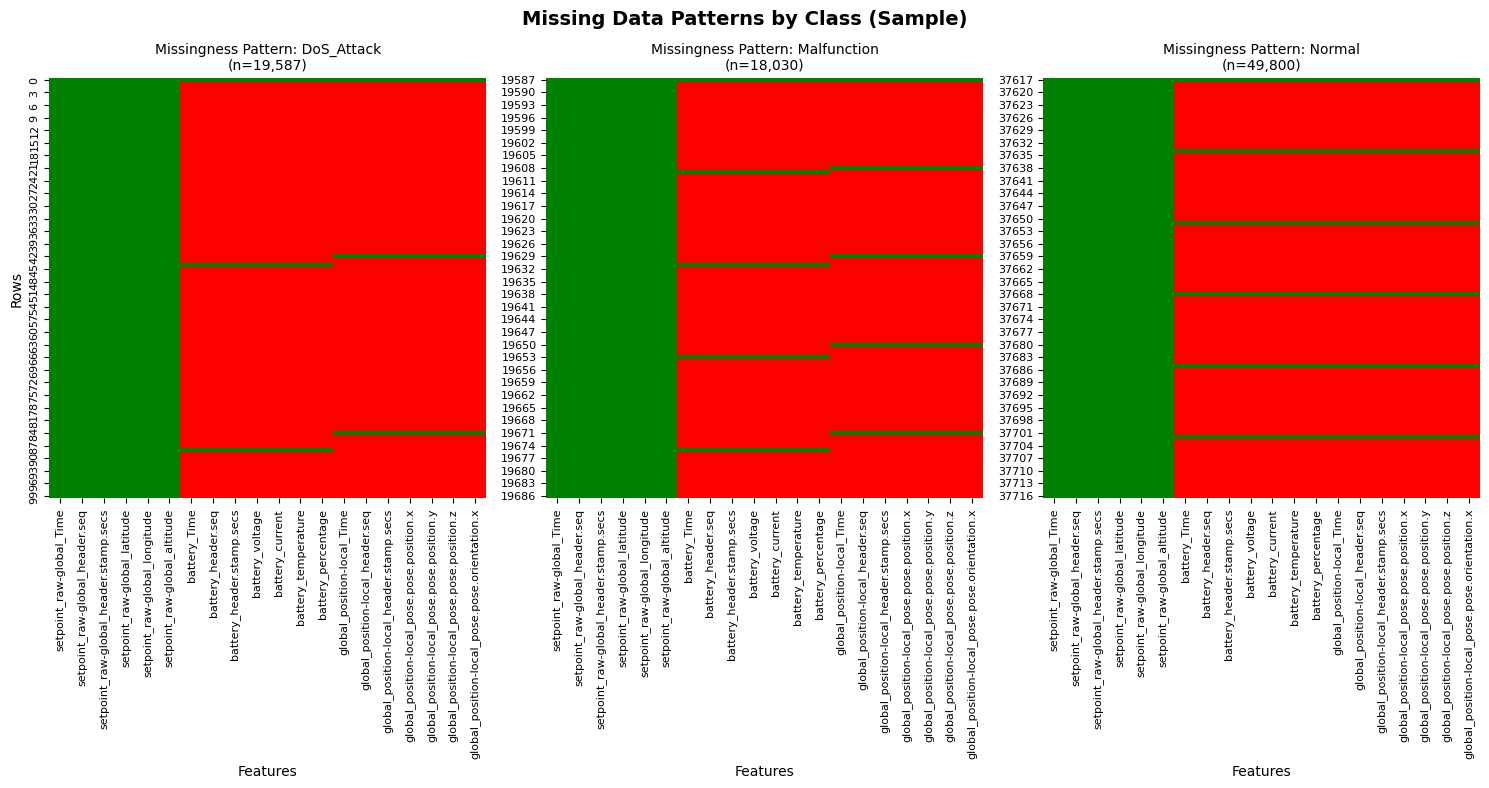


Generating missing percentage comparison plot...


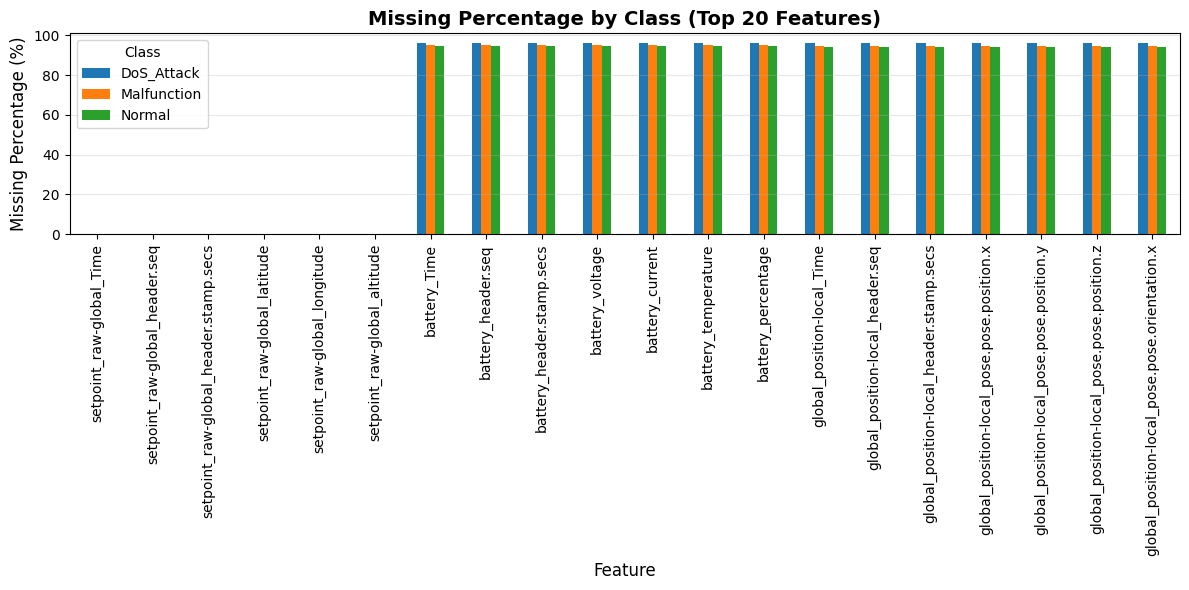


ANALYSIS COMPLETE!

Visualizations saved in '/content/visualizations' folder


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Load your dataset (update the path)
# df = pd.read_csv('your_dataset.csv')

# If you've already loaded it, just run the analysis below:

# 1. Class Distribution
print("="*60)
print("1. CLASS DISTRIBUTION ANALYSIS")
print("="*60)
class_dist = df['class'].value_counts()
print(f"\nTotal rows: {len(df):,}")
print("\nClass distribution:")
for class_name, count in class_dist.items():
    percentage = (count / len(df)) * 100
    print(f"  {class_name}: {count:,} rows ({percentage:.2f}%)")

# 2. Missingness by Class Analysis
print("\n" + "="*60)
print("2. MISSINGNESS PATTERN BY CLASS")
print("="*60)

# Calculate missing percentage for each class
class_names = df['class'].unique()
missing_summary = {}

for class_name in class_names:
    class_df = df[df['class'] == class_name]
    missing_percent = class_df.isnull().mean() * 100

    # Categorize columns by missingness level
    missing_categories = {
        'complete': missing_percent[missing_percent == 0].index.tolist(),
        'low_missing': missing_percent[(missing_percent > 0) & (missing_percent <= 20)].index.tolist(),
        'medium_missing': missing_percent[(missing_percent > 20) & (missing_percent <= 50)].index.tolist(),
        'high_missing': missing_percent[(missing_percent > 50) & (missing_percent <= 90)].index.tolist(),
        'very_high_missing': missing_percent[(missing_percent > 90) & (missing_percent < 100)].index.tolist(),
        'completely_missing': missing_percent[missing_percent == 100].index.tolist()
    }

    missing_summary[class_name] = {
        'total_rows': len(class_df),
        'missing_percent': missing_percent,
        'categories': missing_categories
    }

    print(f"\n{class_name} (n={len(class_df):,}):")
    for category, columns in missing_categories.items():
        print(f"  {category}: {len(columns)} columns")

# 3. Check if missingness is informative
print("\n" + "="*60)
print("3. IS MISSINGNESS INFORMATIVE?")
print("="*60)

# Find columns with different missing patterns across classes
different_missing_cols = []
for col in df.columns:
    if col == 'class':
        continue

    missing_by_class = {}
    for class_name in class_names:
        missing_pct = df[df['class'] == class_name][col].isnull().mean() * 100
        missing_by_class[class_name] = missing_pct

    # Check if missingness differs significantly (>20% difference)
    max_diff = max(missing_by_class.values()) - min(missing_by_class.values())
    if max_diff > 20:  # Significant difference threshold
        different_missing_cols.append((col, missing_by_class, max_diff))

print(f"\nColumns with significantly different missingness across classes: {len(different_missing_cols)}")
if different_missing_cols:
    print("\nTop 10 columns with biggest differences:")
    different_missing_cols.sort(key=lambda x: x[2], reverse=True)
    for col, missing_by_class, max_diff in different_missing_cols[:10]:
        print(f"\n  {col}:")
        for class_name, pct in missing_by_class.items():
            print(f"    {class_name}: {pct:.1f}% missing")

# 4. Complete Cases Analysis
print("\n" + "="*60)
print("4. COMPLETE CASES ANALYSIS")
print("="*60)

complete_cases = df.dropna()
print(f"\nComplete cases (no missing values): {len(complete_cases):,} rows")
print(f"Percentage of complete data: {len(complete_cases)/len(df)*100:.2f}%")

if len(complete_cases) > 0:
    print("\nClass distribution in complete cases:")
    complete_class_dist = complete_cases['class'].value_counts()
    for class_name, count in complete_class_dist.items():
        percentage = (count / len(complete_cases)) * 100
        original_percentage = (class_dist[class_name] / len(df)) * 100
        print(f"  {class_name}: {count:,} rows ({percentage:.1f}%) - Original: {original_percentage:.1f}%")

# 5. Visualization
print("\n" + "="*60)
print("5. CREATING VISUALIZATIONS")
print("="*60)

# Create visualization directory
import os
os.makedirs('visualizations', exist_ok=True)

# Plot 1: Class Distribution
plt.figure(figsize=(5, 6))
bars = plt.bar(class_dist.index, class_dist.values)
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig('visualizations/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Missingness Heatmap by Class
fig, axes = plt.subplots(1, len(class_names), figsize=(15, 8))
if len(class_names) == 1:
    axes = [axes]

for idx, class_name in enumerate(class_names):
    class_df = df[df['class'] == class_name]
    missing_matrix = class_df.isnull().astype(int)

    # Sample for visualization (first 20 columns)
    sample_cols = [col for col in class_df.columns if col != 'class'][:20]
    if sample_cols:
        ax = axes[idx]
        sns.heatmap(missing_matrix[sample_cols].iloc[:100],  # First 100 rows
                   cmap=['green', 'red'],  # Green=present, Red=missing
                   cbar=False,
                   ax=ax)
        ax.set_title(f'Missingness Pattern: {class_name}\n(n={len(class_df):,})', fontsize=10)
        ax.set_xlabel('Features')
        if idx == 0:
            ax.set_ylabel('Rows')
        plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8)
        plt.setp(ax.get_yticklabels(), fontsize=8)

plt.suptitle('Missing Data Patterns by Class (Sample)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('visualizations/missingness_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 3: Missing Percentage Comparison
print("\nGenerating missing percentage comparison plot...")
# Select top 20 columns with data (excluding class)
non_missing_cols = [col for col in df.columns if col != 'class' and df[col].notna().sum() > 0]
top_cols = non_missing_cols[:20]  # First 20 columns with data

if top_cols:
    missing_data = []
    for col in top_cols:
        row = {'Feature': col}
        for class_name in class_names:
            class_missing = df[df['class'] == class_name][col].isnull().mean() * 100
            row[class_name] = class_missing
        missing_data.append(row)

    missing_df = pd.DataFrame(missing_data)
    missing_df = missing_df.set_index('Feature')

    plt.figure(figsize=(12, 6))
    missing_df.plot(kind='bar', ax=plt.gca())
    plt.title('Missing Percentage by Class (Top 20 Features)', fontsize=14, fontweight='bold')
    plt.xlabel('Feature', fontsize=12)
    plt.ylabel('Missing Percentage (%)', fontsize=12)
    plt.legend(title='Class')
    plt.xticks(rotation=90)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('/content/visualizations/missing_percentage_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)
print("\nVisualizations saved in '/content/visualizations' folder")

### Sensor Data Imputation

In [23]:
# 1. Identify column categories
print("\n1. Identifying column categories...")

# Categorize columns based on naming patterns
sensor_columns = []
control_columns = []
state_columns = []
position_columns = []
other_columns = []

for col in df.columns:
    if col == 'class':
        continue
    col_lower = col.lower()

    if any(keyword in col_lower for keyword in ['battery', 'imu', 'current', 'voltage', 'temperature',
                                                'airspeed', 'groundspeed', 'rssi', 'cpu', 'ram']):
        sensor_columns.append(col)
    elif any(keyword in col_lower for keyword in ['rc-out', 'channel', 'throttle', 'control']):
        control_columns.append(col)
    elif any(keyword in col_lower for keyword in ['state', 'armed', 'guided', 'connected']):
        state_columns.append(col)
    elif any(keyword in col_lower for keyword in ['position', 'latitude', 'longitude', 'altitude',
                                                  'orientation', 'velocity', 'heading']):
        position_columns.append(col)
    else:
        other_columns.append(col)

print(f"Sensor columns: {len(sensor_columns)}")
print(f"Control columns: {len(control_columns)}")
print(f"State columns: {len(state_columns)}")
print(f"Position columns: {len(position_columns)}")
print(f"Other columns: {len(other_columns)}")

# Show samples
print("\nSample sensor columns:", sensor_columns[:5])
print("Sample control columns:", control_columns[:5])

# 2. Analyze missing patterns by column category
print("\n2. Analyzing missing patterns...")

def analyze_missing_by_category(col_list, category_name):
    if not col_list:
        return

    missing_stats = []
    for col in col_list:
        missing_pct = df[col].isnull().mean() * 100
        missing_stats.append((col, missing_pct))

    missing_stats.sort(key=lambda x: x[1], reverse=True)

    print(f"\n{category_name} - Missing Statistics:")
    print(f"  Total columns: {len(col_list)}")
    print(f"  Average missing: {np.mean([x[1] for x in missing_stats]):.1f}%")
    print(f"  Max missing: {missing_stats[0][1]:.1f}% ({missing_stats[0][0]})")
    print(f"  Min missing: {missing_stats[-1][1]:.1f}% ({missing_stats[-1][0]})")

    return missing_stats

sensor_stats = analyze_missing_by_category(sensor_columns, "Sensor Columns")
control_stats = analyze_missing_by_category(control_columns, "Control Columns")
position_stats = analyze_missing_by_category(position_columns, "Position Columns")

# 3. Imputation Strategy
print("\n3. Applying sensor-aware imputation...")

# Create a copy for preprocessing
df_processed = df.copy()

# Strategy 1: For sensor columns with >50% missing, use special value + indicator
print("\n   Creating sensor activity indicators...")
for col in sensor_columns:
    missing_pct = df[col].isnull().mean()

    if missing_pct > 0.5:  # Highly missing sensors
        # Create indicator for sensor activity
        indicator_name = f"{col}_active"
        df_processed[indicator_name] = df[col].notna().astype(int)

        # Fill NaN with special value (-999 for tree-based models)
        df_processed[col] = df[col].fillna(-999)

    elif missing_pct > 0:  # Partially missing sensors
        # Use median imputation for partially missing sensors
        median_val = df[col].median()
        df_processed[col] = df[col].fillna(median_val)
    else:
        # Complete columns - no imputation needed
        pass

# Strategy 2: For control/state columns, use mode imputation
for col in control_columns + state_columns:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] if not df[col].mode().empty else 0
        df_processed[col] = df[col].fillna(mode_val)

# Strategy 3: For position columns, use interpolation if sequential
for col in position_columns:
    if df[col].isnull().any():
        # Try forward fill then backward fill
        df_processed[col] = df[col].fillna(method='ffill').fillna(method='bfill')
        # If still NaN, fill with median
        if df_processed[col].isnull().any():
            median_val = df[col].median()
            df_processed[col] = df_processed[col].fillna(median_val)

# 4. Feature Engineering - Domain Knowledge
print("\n4. Feature Engineering for Robot Telemetry...")

# A. Calculate position errors if both current and target positions exist
position_pairs = [
    ('setpoint_raw-global_latitude', 'global_position-global_latitude'),
    ('setpoint_raw-global_longitude', 'global_position-global_longitude'),
    ('setpoint_raw-global_altitude', 'global_position-global_altitude')
]

for target, current in position_pairs:
    if target in df_processed.columns and current in df_processed.columns:
        error_name = f"position_error_{target.split('_')[-1]}"
        df_processed[error_name] = df_processed[target] - df_processed[current]

# B. Battery health metrics
if 'battery_voltage' in df_processed.columns and 'battery_current' in df_processed.columns:
    df_processed['battery_power'] = df_processed['battery_voltage'] * df_processed['battery_current']

if 'battery_percentage' in df_processed.columns:
    df_processed['battery_low'] = (df_processed['battery_percentage'] < 20).astype(int)
    df_processed['battery_critical'] = (df_processed['battery_percentage'] < 10).astype(int)

# C. Motor control statistics
rc_cols = [col for col in df_processed.columns if 'rc-out_channels' in col]
if rc_cols:
    rc_data = df_processed[rc_cols]
    df_processed['motor_control_mean'] = rc_data.mean(axis=1)
    df_processed['motor_control_std'] = rc_data.std(axis=1)
    df_processed['motor_control_range'] = rc_data.max(axis=1) - rc_data.min(axis=1)

# D. System resource metrics
if 'CPU_Percent' in df_processed.columns:
    df_processed['cpu_high'] = (df_processed['CPU_Percent'] > 80).astype(int)

if 'Used_RAM_MB' in df_processed.columns:
    # Assuming 2000MB is high usage (adjust based on your system)
    df_processed['ram_high'] = (df_processed['Used_RAM_MB'] > 2000).astype(int)

# E. Communication quality
if 'RSSI_Quality' in df_processed.columns:
    df_processed['rssi_poor'] = (df_processed['RSSI_Quality'] < 50).astype(int)

# 5. Encode target variable
print("\n5. Encoding target variable...")
label_encoder = LabelEncoder()
df_processed['class_encoded'] = label_encoder.fit_transform(df_processed['class'])
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Class mapping: {class_mapping}")

# 6. Prepare feature matrix and target
X = df_processed.drop(['class', 'class_encoded'], axis=1)
y = df_processed['class_encoded']

print(f"\nFinal dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

# 7. Check for any remaining NaN values
print(f"\nRemaining NaN values: {X.isnull().sum().sum()}")
if X.isnull().sum().sum() > 0:
    print("Columns with remaining NaN:")
    nan_cols = X.columns[X.isnull().any()].tolist()
    for col in nan_cols[:10]:  # Show first 10
        print(f"  - {col}: {X[col].isnull().sum()} NaN")
    # Fill any remaining NaN with -1
    X = X.fillna(-1)

# 8. Split data
print("\n6. Splitting data (70-15-15)...")
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42, shuffle=True
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

print(f"Training set: {X_train.shape} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape} ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape} ({len(X_test)/len(X)*100:.1f}%)")

# 9. Scale features (important for neural networks)
print("\n7. Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for XGBoost
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_val_df = pd.DataFrame(X_val_scaled, columns=X.columns, index=X_val.index)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\n" + "="*60)
print("PREPROCESSING COMPLETE!")
print("="*60)
print(f"Original features: {len(df.columns)-1}")
print(f"Engineered features: {len(X.columns)}")
print(f"Total samples: {len(X)}")
print(f"Class distribution preserved")
print("="*60)


1. Identifying column categories...
Sensor columns: 26
Control columns: 9
State columns: 7
Position columns: 25
Other columns: 11

Sample sensor columns: ['battery_Time', 'battery_header.seq', 'battery_header.stamp.secs', 'battery_voltage', 'battery_current']
Sample control columns: ['rc-out_Time', 'rc-out_header.seq', 'rc-out_header.stamp.secs', 'rc-out_channels_0', 'rc-out_channels_1']

2. Analyzing missing patterns...

Sensor Columns - Missing Statistics:
  Total columns: 26
  Average missing: 96.2%
  Max missing: 99.9% (RSSI_Time)
  Min missing: 94.8% (imu-data_angular_velocity.z)

Control Columns - Missing Statistics:
  Total columns: 9
  Average missing: 95.0%
  Max missing: 95.1% (vfr_hud_throttle)
  Min missing: 95.0% (rc-out_channels_4)

Position Columns - Missing Statistics:
  Total columns: 25
  Average missing: 83.7%
  Max missing: 96.8% (setpoint_raw-target_global_latitude)
  Min missing: 0.0% (setpoint_raw-global_altitude)

3. Applying sensor-aware imputation...

   Crea

/tmp/ipython-input-1425151684.py:102: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_processed[col] = df[col].fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-1425151684.py:125: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_processed['battery_power'] = df_processed['battery_voltage'] * df_processed['battery_current']
/tmp/ipython-input-1425151684.py:128: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_processed['battery


5. Encoding target variable...
Class mapping: {'DoS_Attack': np.int64(0), 'Malfunction': np.int64(1), 'Normal': np.int64(2)}

Final dataset shape: (87417, 116)
Number of features: 116
Number of samples: 87417

Remaining NaN values: 670864
Columns with remaining NaN:
  - vfr_hud_Time: 83094 NaN
  - vfr_hud_header.seq: 83094 NaN
  - vfr_hud_header.stamp.secs: 83094 NaN
  - vfr_hud_climb: 83094 NaN
  - setpoint_raw-target_global_Time: 84622 NaN
  - setpoint_raw-target_global_header.seq: 84622 NaN
  - setpoint_raw-target_global_header.stamp.secs: 84622 NaN
  - setpoint_raw-target_global_yaw: 84622 NaN

6. Splitting data (70-15-15)...
Training set: (61189, 116) (70.0%)
Validation set: (13115, 116) (15.0%)
Test set: (13113, 116) (15.0%)

7. Scaling features...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1120: RuntimeWarning: overflow encountered in square
  temp **= 2
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:81: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2



PREPROCESSING COMPLETE!
Original features: 78
Engineered features: 116
Total samples: 87417
Class distribution preserved


In [26]:
# ===========================================================================
# FIX REMAINING ISSUES
# ===========================================================================

print("="*60)
print("FIXING REMAINING ISSUES")
print("="*60)

# 1. Handle remaining NaN values
print("\n1. Handling remaining NaN values...")

# Check which columns still have NaN
nan_cols = X.columns[X.isnull().any()].tolist()
print(f"Columns with NaN after first imputation: {len(nan_cols)}")

# Fill remaining NaN with appropriate values
for col in X.columns:
    if X[col].isnull().any():
        # Check column type
        if X[col].dtype in ['float64', 'int64', 'float32', 'int32']:
            # For numerical columns, use median
            median_val = X[col].median()
            X[col] = X[col].fillna(median_val)
        else:
            # For categorical/other, use mode or 0
            X[col] = X[col].fillna(0)

print(f"Remaining NaN after final imputation: {X.isnull().sum().sum()}")

# 2. Handle extreme values before scaling
print("\n2. Handling extreme values...")

# Check for extreme values that cause overflow
for col in X.select_dtypes(include=[np.number]).columns:
    col_std = X[col].std()
    col_mean = X[col].mean()

    if col_std > 1000 * abs(col_mean):  # Extreme variance
        print(f"  Extreme variance in {col}: mean={col_mean:.2f}, std={col_std:.2f}")
        # Apply log transformation or clipping
        if (X[col] > 0).all():  # All positive values
            X[col] = np.log1p(X[col])
        else:
            # Clip extreme values
            q1 = X[col].quantile(0.01)
            q99 = X[col].quantile(0.99)
            X[col] = X[col].clip(lower=q1, upper=q99)

# 3. Re-split and scale (properly this time)
print("\n3. Re-splitting and scaling data...")

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42, shuffle=True
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

print(f"Training set: {X_train.shape} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape} ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape} ({len(X_test)/len(X)*100:.1f}%)")

# 4. Use RobustScaler instead of StandardScaler (handles outliers better)
from sklearn.preprocessing import RobustScaler

print("\n4. Applying RobustScaler (better for outliers)...")
scaler = RobustScaler(quantile_range=(25, 75))

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_val_df = pd.DataFrame(X_val_scaled, columns=X.columns, index=X_val.index)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\n5. Final check...")
print(f"Training data range: [{X_train_scaled.min():.2f}, {X_train_scaled.max():.2f}]")
print(f"Training data mean: {X_train_scaled.mean():.4f}, std: {X_train_scaled.std():.4f}")

# Convert labels to categorical for neural networks
num_classes = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

print("\n" + "="*60)
print("DATA READY FOR MODELING!")
print("="*60)
print(f"Features: {X_train_df.shape[1]}")
print(f"Samples - Train: {X_train_df.shape[0]}, Val: {X_val_df.shape[0]}, Test: {X_test_df.shape[0]}")
print(f"Classes: {num_classes}")
print("="*60)

FIXING REMAINING ISSUES

1. Handling remaining NaN values...
Columns with NaN after first imputation: 0
Remaining NaN after final imputation: 0

2. Handling extreme values...

3. Re-splitting and scaling data...
Training set: (61189, 116) (70.0%)
Validation set: (13115, 116) (15.0%)
Test set: (13113, 116) (15.0%)

4. Applying RobustScaler (better for outliers)...

5. Final check...
Training data range: [-998001.00, 1729874870.07]
Training data mean: 5641697.8216, std: 98625898.7556

DATA READY FOR MODELING!
Features: 116
Samples - Train: 61189, Val: 13115, Test: 13113
Classes: 3


### 1D-CNN Implementation

In [ ]:
# Reshape data differently: (samples, timesteps, features_per_timestep)
# Since we don't have explicit time series, let's treat each feature as a "timestep"
# and use only 1 feature per timestep
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(-1, X_val_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

print(f"CNN input shape: {X_train_cnn.shape}")
print(f"Sequence length (timesteps): {X_train_cnn.shape[1]}")
print(f"Features per timestep: {X_train_cnn.shape[2]}")

def build_cnn_model_v2(input_shape, num_classes, filters=64, kernel_size=3, dropout_rate=0.3):
    model = keras.Sequential()

    # Input layer
    model.add(layers.Input(shape=input_shape))

    # First Conv Block
    model.add(layers.Conv1D(filters=filters, kernel_size=kernel_size,
                           activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(dropout_rate))

    # Second Conv Block
    model.add(layers.Conv1D(filters=filters*2, kernel_size=kernel_size,
                           activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(dropout_rate))

    # Third Conv Block
    model.add(layers.Conv1D(filters=filters*4, kernel_size=kernel_size,
                           activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dropout(dropout_rate))

    # Dense Layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Build model
input_shape = (X_train_cnn.shape[1], X_train_cnn.shape[2])
cnn_model = build_cnn_model_v2(input_shape, num_classes, kernel_size=5)

# Compile
cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy',
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)

print("\nCNN Model Summary:")
cnn_model.summary()

# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# Train
print("\nTraining CNN model...")
history_cnn = cnn_model.fit(
    X_train_cnn, y_train_cat,
    validation_data=(X_val_cnn, y_val_cat),
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

# Evaluate
print("\nEvaluating CNN model...")
cnn_test_loss, cnn_test_acc, cnn_test_precision, cnn_test_recall = cnn_model.evaluate(
    X_test_cnn, y_test_cat, verbose=0
)
cnn_test_f1 = 2 * (cnn_test_precision * cnn_test_recall) / (cnn_test_precision + cnn_test_recall + 1e-7)

print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")
print(f"CNN Test Precision: {cnn_test_precision:.4f}")
print(f"CNN Test Recall: {cnn_test_recall:.4f}")
print(f"CNN Test F1-Score: {cnn_test_f1:.4f}")

CNN input shape: (61189, 116, 1)
Sequence length (timesteps): 116
Features per timestep: 1

CNN Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 116, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 116, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 58, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 58, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 58, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 58, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 29, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 29, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 29, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 29, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,475 (974.51 KB)

 Trainable params: 248,195 (969.51 KB)

 Non-trainable params: 1,280 (5.00 KB)


Training CNN model...
Epoch 1/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 109s 107ms/step - accuracy: 0.4891 - loss: 1.1646 - precision: 0.5042 - recall: 0.3593 - val_accuracy: 0.5750 - val_loss: 0.9782 - val_precision: 0.5754 - val_recall: 0.5687 - learning_rate: 0.0010
Epoch 2/50
116/957 ━━━━━━━━━━━━━━━━━━━━ 1:26 103ms/step - accuracy: 0.5743 - loss: 0.9938 - precision: 0.5723 - recall: 0.5122